# CH03 - Questions & Exercises

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_decision_regions

## Implement decision tree classifier.

### Load and prepare dataset

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Train Decision Tree Classifier

In [4]:
from ch03.models import DecisionTreeClassifier

In [29]:
dtc = DecisionTreeClassifier(max_depth=5, criterion="entropy")
dtc.fit(X_train_std, y_train)

In [30]:
yhat_test = dtc.predict(X_test_std)
print("Accuracy: %.2f%%" % (100*sum(yhat_test == y_test)/y_test.shape[0]))

Accuracy: 97.78%


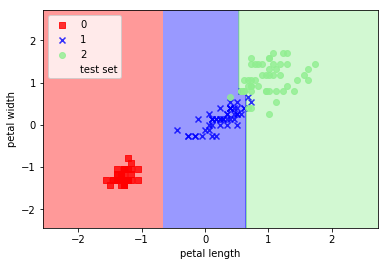

In [31]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=dtc, test_idx=range(105, 150))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc="upper left")
plt.show()